# Data Wrangling

In [336]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore

In [337]:
raw_salary_df = pd.read_csv('ds_salaries.csv')

In [338]:
raw_salary_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [339]:
salary = raw_salary_df.copy()

## Checking Syntax & Validating Data Types

In [340]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Data types are where I want them to be at, minus the columns I will be removing thus far

In [341]:
salary.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [342]:
salary.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [343]:
salary = salary.rename(columns = str.lower)
salary

,unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [344]:
salary.drop(columns = "unnamed: 0", inplace = True)

In [345]:
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


## Cleansing Data

In [346]:
salary.work_year.value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [347]:
salary.experience_level.value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

In [348]:
salary.employment_type.value_counts()

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

Dropping those that are not full time can help clean our dataset.

In [349]:
not_ft = salary[salary.employment_type != 'FT'].index
salary.drop(not_ft, inplace = True)

In [350]:
salary.employment_type.unique()

array(['FT'], dtype=object)

In [351]:
salary

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


Now that everything only includes full-time employees, we can drop the column for clarity.

In [352]:
salary.drop(columns = "employment_type", inplace = True)

In [353]:
salary

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,Data Analyst,150000,USD,150000,US,100,US,M


In [354]:
salary.salary_in_usd.describe()

count       588.000000
mean     113468.073129
std       69476.470098
min        2859.000000
25%       64962.250000
50%      104196.500000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

In [355]:
salary.salary_in_usd.sort_values(ascending=False).head()

252    600000
97     450000
33     450000
157    423000
63     412000
Name: salary_in_usd, dtype: int64

I will be addressing these when I find any outliers later.

## Detecting Null Values

In [356]:
salary.isna().sum()

work_year             0
experience_level      0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Luckily there are none!

## Detecting & Treating Outliers

In [357]:
salary.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,588.000000,5.880000e+02,588.000000,588.000000
mean,2021.418367,3.311246e+05,113468.073129,70.748299
std,0.689520,1.568478e+06,69476.470098,41.002571
min,2020.000000,4.000000e+03,2859.000000,0.000000
25%,2021.000000,7.000000e+04,64962.250000,50.000000
50%,2022.000000,1.152500e+05,104196.500000,100.000000
75%,2022.000000,1.650000e+05,150000.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


<Axes: >

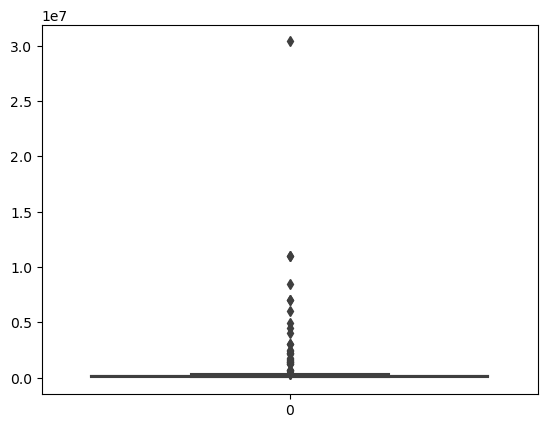

In [358]:
sns.boxplot(data = salary.salary)

<Axes: >

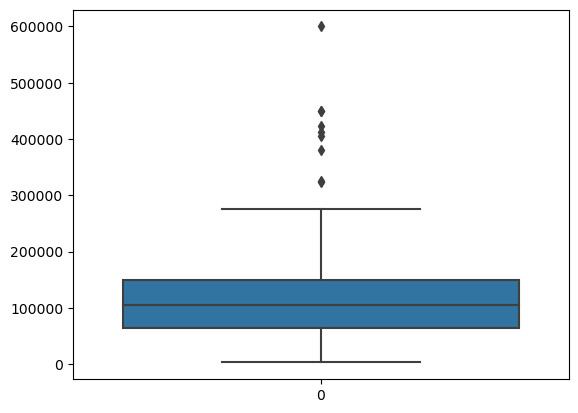

In [359]:
sns.boxplot(data = salary.salary_in_usd)

<Axes: >

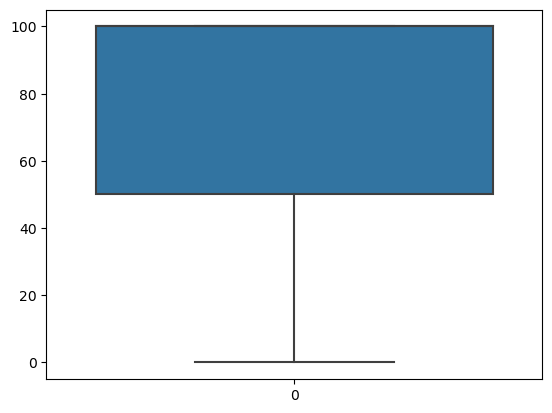

In [360]:
sns.boxplot(data = salary.remote_ratio)

Despite salary having many outliers, I will be primarily focusing on salary_in_usd since we will need to standardize the dollar measurement. We will need to dive deeper in that category. remote_ratio is fine to leave as is since we already determined that the values were all of 0, 50, and 100.

In [361]:
salary['usd_salary_zscore'] = zscore(salary.salary_in_usd)

In [362]:
salary

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Data Engineer,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,Data Engineer,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,Data Analyst,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,Data Analyst,150000,USD,150000,US,100,US,M,0.526265


In [363]:
salary.query('usd_salary_zscore > 3 or usd_salary_zscore < -3')

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
25,2020,EX,Director of Data Science,325000,USD,325000,US,100,US,L,3.047248
33,2020,MI,Research Scientist,450000,USD,450000,US,0,US,M,4.847950
63,2020,SE,Data Scientist,412000,USD,412000,US,100,US,L,4.300537
97,2021,MI,Financial Data Analyst,450000,USD,450000,US,100,US,L,4.847950
157,2021,MI,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L,4.458998
252,2021,EX,Principal Data Engineer,600000,USD,600000,US,100,US,L,7.008793
482,2022,EX,Data Engineer,324000,USD,324000,US,100,US,M,3.032842
519,2022,SE,Applied Data Scientist,380000,USD,380000,US,100,US,L,3.839557
523,2022,SE,Data Analytics Lead,405000,USD,405000,US,100,US,L,4.199697


In [364]:
salary.salary_in_usd.sort_values(ascending=False).head(15)

252    600000
97     450000
33     450000
157    423000
63     412000
523    405000
519    380000
25     325000
482    324000
93     276000
534    266400
1      260000
416    260000
231    256000
167    250000
Name: salary_in_usd, dtype: int64

All of these both match in both salary_currency and salary_in_usd, so it is unlikely their salary is a typing error.
All of these entries are very high compared to the majority of our dataset and skews the dataset.

In [365]:
salary.salary_in_usd.sort_values(ascending=False).head(15)

252    600000
97     450000
33     450000
157    423000
63     412000
523    405000
519    380000
25     325000
482    324000
93     276000
534    266400
1      260000
416    260000
231    256000
167    250000
Name: salary_in_usd, dtype: int64

In [366]:
salary = salary.query('usd_salary_zscore < 3 and usd_salary_zscore > -3').copy()


salary.query('usd_salary_zscore > 3 or usd_salary_zscore < -3')

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore


In [367]:
salary

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Data Engineer,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,Data Engineer,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,Data Analyst,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,Data Analyst,150000,USD,150000,US,100,US,M,0.526265


I am also going to remove entries with salary lower than 15,000 USD. This is because the minimum wage equates to 15,000 USD in the US.

In [368]:
salary.salary_in_usd.sort_values(ascending = True).head(20)

176     2859
238     4000
185     4000
179     5679
18      5707
213     5882
50      6072
21      6072
15      8000
196     9272
127     9466
38     10000
521    10000
247    12103
205    12901
153    13400
230    16228
262    16904
192    18000
244    18053
Name: salary_in_usd, dtype: int64

In [369]:
min_salary = 15000

In [370]:
salary = salary.query('salary_in_usd >= 15000').copy()


salary.query('salary_in_usd < 15000')

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore


In [371]:
salary.salary_in_usd.describe()

count       563.000000
mean     111589.367673
std       55953.616960
min       16228.000000
25%       66632.500000
50%      105000.000000
75%      150000.000000
max      276000.000000
Name: salary_in_usd, dtype: float64

## Feature Engineering

In [372]:
salary

,work_year,experience_level,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,Data Scientist,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,Product Data Analyst,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,Machine Learning Engineer,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Data Engineer,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,Data Engineer,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,Data Analyst,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,Data Analyst,150000,USD,150000,US,100,US,M,0.526265


In [373]:
salary.job_title.value_counts()

Data Scientist                              133
Data Engineer                               126
Data Analyst                                 93
Machine Learning Engineer                    41
Research Scientist                           15
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             7
Data Analytics Manager                        7
Machine Learning Scientist                    7
Principal Data Scientist                      6
Data Science Consultant                       6
Director of Data Science                      6
Lead Data Engineer                            6
BI Data Analyst                               5
AI Scientist                                  5
Head of Data                                  5
Data Engineering Manager                      5
Head of Data Science                          4
Data Analytics Engineer                       4
Applied Data Scientist                  

I notice that most of these can be categorized into either being a(n): engineer, analyst, scientist, architect, developer, or executive role. I will be creating a column to attribute these data entries into one of these categories.

In [374]:
salary.insert(3, "job_type", '')

In [375]:
salary

,work_year,experience_level,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,Data Scientist,,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,Machine Learning Scientist,,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,Big Data Engineer,,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,Product Data Analyst,,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,Machine Learning Engineer,,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Data Engineer,,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,Data Engineer,,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,Data Analyst,,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,Data Analyst,,150000,USD,150000,US,100,US,M,0.526265


In [376]:
job_cats = ['Manager/Executive', 'Engineer', 'Scientist', 'Developer', 'Architect', 'Consultant', 'Analyst']

In [377]:
conditions = [
    ((salary['job_title'].str.contains('Manager', regex=False)) | (salary['job_title'].str.contains('Head', regex=False)) | (salary['job_title'].str.contains('Director', regex=False))),
    (salary['job_title'].str.contains('Engineer', regex=False)),
    (salary['job_title'].str.contains('Scientist', regex=False)),
    (salary['job_title'].str.contains('Developer', regex=False)),
    (salary['job_title'].str.contains('Architect', regex=False)),
    (salary['job_title'].str.contains('Consultant', regex=False)),
    ((salary['job_title'].str.contains('Analyst', regex=False)) |  (salary['job_title'].str.contains('Analytics', regex=False)))
    ]
# order matters, so managers & heads will be first

In [378]:
salary.job_type = np.select(conditions, job_cats)

In [379]:
salary

,work_year,experience_level,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,0.526265


In [380]:
salary.job_type.value_counts()

Engineer             210
Scientist            175
Analyst              111
Manager/Executive     43
Architect             12
Consultant             6
Developer              5
0                      1
Name: job_type, dtype: int64

In [381]:
salary.loc[salary['job_type'] == '0']

,work_year,experience_level,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
165,2021,SE,Data Specialist,0,165000,USD,165000,US,100,US,L,0.742349


In [382]:
salary.job_type.value_counts()

Engineer             210
Scientist            175
Analyst              111
Manager/Executive     43
Architect             12
Consultant             6
Developer              5
0                      1
Name: job_type, dtype: int64

I'm going to drop the data specialist since it's proven to be too unique to put into a category and can skew data.

In [383]:
specialist = salary[salary.job_type == '0'].index
salary.drop(specialist, inplace = True)

In [384]:
salary.job_type.unique()

array(['Scientist', 'Engineer', 'Analyst', 'Manager/Executive',
       'Consultant', 'Developer', 'Architect'], dtype=object)

In [385]:
salary

,work_year,experience_level,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,0.526265


I will also add columns to change experience_level and company_size to numerical grades (keeping original columns for visualizations but allowing numerical grades for machine learning).

In [386]:
salary.insert(2, "exp_grade", '')

In [387]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,0.526265


In [388]:
exp_cats = [1, 2, 3, 4]

In [389]:
salary.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [390]:
exp_conditions = [
    (salary['experience_level'].str.contains('EN', regex=False)),
    (salary['experience_level'].str.contains('MI', regex=False)),
    (salary['experience_level'].str.contains('SE', regex=False)),
    (salary['experience_level'].str.contains('EX', regex=False))
        ]

In [391]:
salary.exp_grade = np.select(exp_conditions, exp_cats)

In [392]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,usd_salary_zscore
0,2020,MI,2,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,-0.484534
1,2020,SE,3,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,2.110883
2,2020,SE,3,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,-0.064020
3,2020,MI,2,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,-1.346465
4,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,0.583887
603,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,0.180530
604,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,0.223747
605,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,0.526265


In [393]:
salary.insert(len(salary.columns) - 1, "comp_size_grade", '')

In [394]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
0,2020,MI,2,Data Scientist,Scientist,70000,EUR,79833,DE,0,DE,L,,-0.484534
1,2020,SE,3,Machine Learning Scientist,Scientist,260000,USD,260000,JP,0,JP,S,,2.110883
2,2020,SE,3,Big Data Engineer,Engineer,85000,GBP,109024,GB,50,GB,M,,-0.064020
3,2020,MI,2,Product Data Analyst,Analyst,20000,USD,20000,HN,0,HN,S,,-1.346465
4,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,,0.526265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,,0.583887
603,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,,0.180530
604,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,,0.223747
605,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,,0.526265


In [395]:
size_cats = [1, 2, 3]

In [396]:
size_conditions = [
    (salary['company_size'].str.contains('S', regex=False)),
    (salary['company_size'].str.contains('M', regex=False)),
    (salary['company_size'].str.contains('L', regex=False))
        ]

In [397]:
salary.comp_size_grade = np.select(size_conditions, size_cats)

In [334]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore


In [64]:
salary.to_csv('salary_cleaned.csv', index = False)

### USA Data

In [398]:
not_usa = salary[salary.company_location != 'US'].index
salary.drop(not_usa, inplace = True)

In [399]:
salary

,work_year,experience_level,exp_grade,job_title,job_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,comp_size_grade,usd_salary_zscore
4,2020,SE,3,Machine Learning Engineer,Engineer,150000,USD,150000,US,50,US,L,3,0.526265
5,2020,EN,1,Data Analyst,Analyst,72000,USD,72000,US,100,US,L,3,-0.597373
6,2020,SE,3,Lead Data Scientist,Scientist,190000,USD,190000,US,100,US,S,1,1.102490
8,2020,MI,2,Business Data Analyst,Analyst,135000,USD,135000,US,100,US,L,3,0.310181
13,2020,MI,2,Lead Data Analyst,Analyst,87000,USD,87000,US,100,US,L,3,-0.381289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,3,Data Engineer,Engineer,154000,USD,154000,US,100,US,M,2,0.583887
603,2022,SE,3,Data Engineer,Engineer,126000,USD,126000,US,100,US,M,2,0.180530
604,2022,SE,3,Data Analyst,Analyst,129000,USD,129000,US,0,US,M,2,0.223747
605,2022,SE,3,Data Analyst,Analyst,150000,USD,150000,US,100,US,M,2,0.526265


In [400]:
salary.to_csv('us_salary_cleaned.csv', index = False)